In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
import seaborn as sns

In [2]:

#Lets create heatmap for purchases with regards to day of week and hours
"""day_hours=data[['weekday','hour']]
day_hours_freq = day_hours.groupby('weekday')['hour'].value_counts().reset_index(name='count')
#day_hours_freq
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
day_hours_freq['weekday'] = pd.Categorical(day_hours_freq['weekday'], categories=days, ordered=True)
day_hours_freq=day_hours_freq.sort_values(["weekday","hour"])
day_hours_freq=day_hours_freq.pivot("weekday",'hour','count')
print(day_hours_freq)"""

'day_hours=data[[\'weekday\',\'hour\']]\nday_hours_freq = day_hours.groupby(\'weekday\')[\'hour\'].value_counts().reset_index(name=\'count\')\n#day_hours_freq\ndays = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]\nday_hours_freq[\'weekday\'] = pd.Categorical(day_hours_freq[\'weekday\'], categories=days, ordered=True)\nday_hours_freq=day_hours_freq.sort_values(["weekday","hour"])\nday_hours_freq=day_hours_freq.pivot("weekday",\'hour\',\'count\')\nprint(day_hours_freq)'

In [21]:

def generate_heatmap_seller(seller,prod_cat_i):
    data = pd.read_csv('../FeatureEng/data_under_observation_count.csv')
    ## Create new columns for day,time:
    data['weekday']=pd.to_datetime(data['order_purchase_timestamp']).dt.weekday_name
    data['hour']=pd.to_datetime(data['order_purchase_timestamp']).dt.hour
    data_filtered=data[data['seller_id']==seller]
    i=prod_cat_i
    if(len(data_filtered)==0):
        print("Sorry!!!! Not much information about this seller at this moment. Try some other seller")
    else:
        prod_cat=list(set(data_filtered['product_category_name_english']))
        if(i in prod_cat):
            day_hours=data_filtered[data_filtered['product_category_name_english']==i][['weekday','hour']]
            day_hours_freq = day_hours.groupby('weekday')['hour'].value_counts().reset_index(name='count')
            days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
            day_hours_freq['weekday'] = pd.Categorical(day_hours_freq['weekday'], categories=days, ordered=True)
            day_hours_freq=day_hours_freq.sort_values(["weekday","hour"])
            day_hours_freq=day_hours_freq.pivot("weekday",'hour','count')

            #HeatMap with respect to sellers and their product category

            plt.figure(figsize=(10,5))
            ax=sns.heatmap(day_hours_freq,annot=True,cmap="OrRd")
            ax.set_xlabel("Hour")
            ax.set_ylabel("Day")
            ax.set_title("Heatmap of tranactions over the hour by day for %s for category %s"%(seller,i),size=10)
        else:
            print("Sorry!!!! Not much information about this Product Category at this moment. Try some other category")

In [4]:
"""#General HeatMap irrespective of sellers or products

plt.figure(figsize=(15,8))
ax=sns.heatmap(day_hours_freq,annot=True,fmt="d",cmap="OrRd")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of tranactions over the hour by day",size=10)"""

'#General HeatMap irrespective of sellers or products\n\nplt.figure(figsize=(15,8))\nax=sns.heatmap(day_hours_freq,annot=True,fmt="d",cmap="OrRd")\nax.set_xlabel("Hour")\nax.set_ylabel("Day")\nax.set_title("Heatmap of tranactions over the hour by day",size=10)'

In [30]:
#Analysing the reviews
def check_reviews(seller,prod_cat_i):
    data = pd.read_csv('../FeatureEng/data_under_observation_count.csv')
    ## Create new columns for day,time:
    data['weekday']=pd.to_datetime(data['order_purchase_timestamp']).dt.weekday_name
    data['hour']=pd.to_datetime(data['order_purchase_timestamp']).dt.hour
    data['year_month'] = pd.to_datetime(data['order_purchase_timestamp']).dt.to_period('M')
    i=prod_cat_i
    data_filtered=data[data['seller_id']==seller]
    if(len(data_filtered)==0):
        print("Sorry!!!! Not much information about this seller at this moment. Try some other seller")
    else:
        prod_cat=list(set(data_filtered['product_category_name_english']))
        if(i in prod_cat):
            data_prod=data_filtered[data_filtered['product_category_name_english']==i]
            reviews_timeseries = data_prod.groupby('year_month')['review_score'].agg(['count', 'mean'])
            print(reviews_timeseries.index)
            ax = sns.lineplot(
            x=reviews_timeseries.index.to_timestamp(), 
            y='count', 
            data=reviews_timeseries, 
            color='#984ea3', 
            label='count'
            )
            #plt.figure(figsize=(10,5))
            plt.title("%s for category %s"%(seller,i))
            sns.lineplot(
                x=reviews_timeseries.index.to_timestamp(),
                y='mean',
                data=reviews_timeseries, 
                ax=ax.twinx(), 
                color='#ff7f00', 
                label='mean'
            ).set(ylabel='Average Review Score');
        else:
            print("Sorry!!!! Not much information about this Product Category at this moment. Try some other category")


In [34]:
def cumReviewSale(seller,prod_cat_i):
    data = pd.read_csv('../FeatureEng/data_under_observation_count.csv')
    ## Create new columns for day,time:
    data['weekday']=pd.to_datetime(data['order_purchase_timestamp']).dt.weekday_name
    data['hour']=pd.to_datetime(data['order_purchase_timestamp']).dt.hour
    data['year_month'] = pd.to_datetime(data['order_purchase_timestamp']).dt.to_period('M')
    i=prod_cat_i
    data_filtered=data[data['seller_id']==seller]
    if(len(data_filtered)==0):
        print("Sorry!!!! Not much information about this seller at this moment. Try some other seller")
    else:
        prod_cat=list(set(data_filtered['product_category_name_english']))
        if(i in prod_cat):
            print(i)
            #Selecting each Product categories of the given seller
            data=data_filtered[data_filtered['product_category_name_english']==i]
            #print(data)
            reviews_timeseries = data.groupby('year_month',as_index=True)['review_score'].agg(['count', 'sum'])
            df_review=reviews_timeseries.cumsum().reset_index()
            df_review['sum']=df_review['sum']/df_review['count']
            df_review.set_index(df_review['year_month'])
            fig, ax = plt.subplots()
            plt.title("%s for category %s"%(seller,i))
            x= np.arange(0,len(df_review),1)
            ax.bar(x,df_review['count'])
            ax.set_xticks(x)
            ax.set_xticklabels(df_review.index,rotation="vertical")
            ax2=ax.twinx()
            ax2.plot(ax.get_xticks(),df_review['sum'])
        else:
            print("Sorry!!!! Not much information about this Product Category at this moment. Try some other category")

In [56]:
def diffReviewSale(seller,prod_cat_i):
    data = pd.read_csv('../FeatureEng/data_under_observation_count.csv')
    ## Create new columns for day,time:
    data['weekday']=pd.to_datetime(data['order_purchase_timestamp']).dt.weekday_name
    data['hour']=pd.to_datetime(data['order_purchase_timestamp']).dt.hour
    data['year_month'] = pd.to_datetime(data['order_purchase_timestamp']).dt.to_period('M')
    data_filtered=data[data['seller_id']==seller]
    i=prod_cat_i
    if(len(data_filtered)==0):
        print("Sorry!!!! Not much information about this seller at this moment. Try some other seller")
    else:
        prod_cat=list(set(data_filtered['product_category_name_english']))
        if(i in prod_cat):
            print(i)
            #Selecting each Product categories of the given seller
            data=data_filtered[data_filtered['product_category_name_english']==i]
            #print(data)
            reviews_timeseries = data.groupby('year_month',as_index=True)['review_score'].agg(['count', 'sum'])            
            #Find the difference in sale with respect to each month
            reviews_timeseries['diff_sale']=reviews_timeseries['count'].diff(1)
            #print("Reviews timeseries",reviews_timeseries)            
            df_review=reviews_timeseries.reset_index()
            df_review['sum']=df_review['sum']/df_review['count']
            df_review.set_index(df_review['year_month'], inplace=True, drop=True)
            #print(df_review.index)
            fig, ax = plt.subplots()
            plt.title("%s for category %s"%(seller,i))
            x= np.arange(0,len(df_review),1)
            ax.bar(x,df_review['diff_sale'])
            ax.set_xticks(x)
            ax.set_xticklabels(df_review.index,rotation="vertical")
            ax2=ax.twinx()
            ax2.plot(ax.get_xticks(),df_review['sum'])
        else:
            print("Sorry!!!! Not much information about this Product Category at this moment. Try some other category")

Heat Map


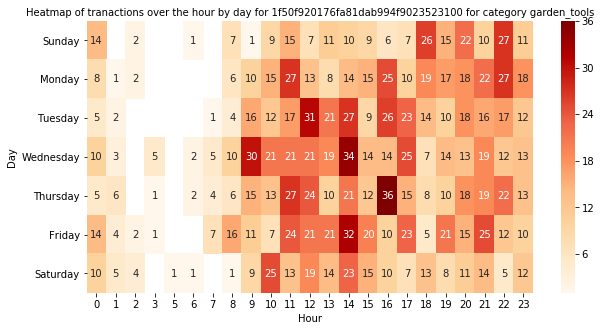

In [26]:
print("Heat Map")
generate_heatmap_seller('1f50f920176fa81dab994f9023523100','garden_tools')

Reviews
PeriodIndex(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08'],
            dtype='period[M]', name='year_month', freq='M')


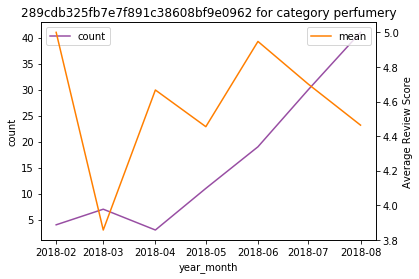

In [59]:
print("Reviews")
check_reviews('289cdb325fb7e7f891c38608bf9e0962','perfumery')

perfumery


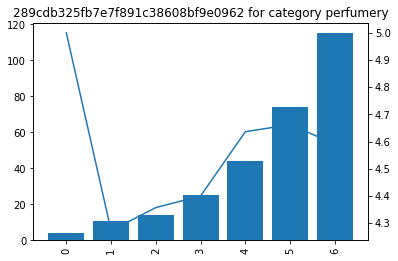

In [60]:
data.head()
cumReviewSale('289cdb325fb7e7f891c38608bf9e0962','perfumery')

perfumery
Reviews timeseries             count  sum  diff_sale
year_month                       
2018-02         4   20        NaN
2018-03         7   27        3.0
2018-04         3   14       -4.0
2018-05        11   49        8.0
2018-06        19   94        8.0
2018-07        30  141       11.0
2018-08        41  183       11.0
PeriodIndex(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08'],
            dtype='period[M]', name='year_month', freq='M')


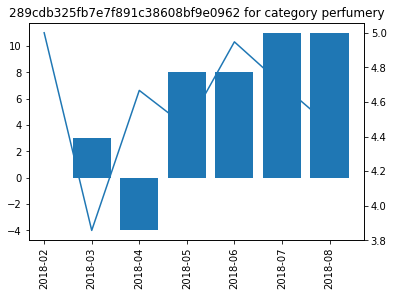

In [61]:
diffReviewSale('289cdb325fb7e7f891c38608bf9e0962','perfumery')